# Track HEAL Platform Study Registration

In [1]:
import pandas as pd
import altair as alt
alt.renderers.enable('svg')
from functions import get_slmd
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

Start by getting study data from MDS.

In [2]:
df = get_slmd()

Calculate and plot cumulative number registered.

In [3]:
df['Date registered'] = pd.to_datetime(df['gen3_discovery.time_of_registration'], utc=True).dt.date.astype('str')
cumsum = df.groupby('Date registered').size().cumsum().to_frame(name='Number registered').reset_index()

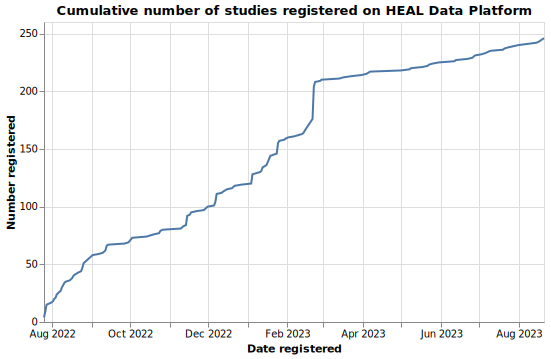

In [4]:
alt.Chart(cumsum).mark_line().encode(
    y='Number registered',
    x=alt.X('Date registered:T', axis=alt.Axis(format='%b %Y'))
).properties(
    height=300,
    width=500,
    title='Cumulative number of studies registered on HEAL Data Platform'
)